In [1]:
import numpy as np
import pandas as pd

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,cross_val_score,KFold
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import preprocessing


#libraries for model performance evaluation
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,f1_score

#libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.colors import ListedColormap

# libraries for computation
import pandas as pd
import numpy as np

#library for train test split
from sklearn.model_selection import train_test_split,cross_val_score,KFold

#library for preprocessing
from sklearn.preprocessing import StandardScaler

#library for Dimensionality reduction
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD

#Library for feature selection techniques
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectFromModel

#libraries for various ML models 
from sklearn import svm
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
#ensemble models
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestRegressor



#libraries for model performance evaluation
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,f1_score

#libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.colors import ListedColormap

import warnings
warnings.filterwarnings('ignore')

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
def plotConfusion(cm):
    sns.set_style('white')
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Pastel1)
    classNames = ['Developed','Developing']
    plt.title('Confusion Matrix',fontsize = 15)
    plt.ylabel('True label',fontsize=15)
    plt.xlabel('Predicted label',fontsize=15)
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames,fontsize=12)
    plt.yticks(tick_marks, classNames,fontsize=12)
    s = [['TP','FN'], ['FP', 'TN']]
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
    plt.show()

In [3]:
data_poverty = pd.read_csv('Poverty-output.csv')
data_arms_import = pd.read_csv('Arms-extracted-feature.csv')
data_gdp = pd.read_csv('Gdp-output.csv')
data_military = pd.read_csv('Military-output.csv')

In [4]:
import pandas as pd
df = pd.concat([data_poverty,data_arms_import,data_gdp,data_military])

In [5]:
df.shape

(854, 797)

In [6]:
df.label.value_counts()

1    716
0    138
Name: label, dtype: int64

In [72]:
y = df['label']
X = df.drop(columns=['Unnamed: 0', 'id','label'])

In [73]:
# train and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=42)

[0.7647133354450428, 0.7567078230693791, 0.782616882877646, 0.7772853185595568, 0.7544659694839705, 0.782616882877646, 0.7684625356494685, 0.778747587598072, 0.7550917613040132, 0.7665339335180055, 0.7527042567934437, 0.7627451437632627, 0.7627451437632627, 0.7627451437632627, 0.7646252258226671]


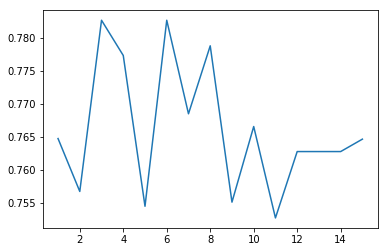

In [76]:
#KNN for different k values
kVals = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
scores = []

for k in kVals:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    pred = knn.predict(X_test)
    scores.append(f1_score(y_test,pred,average='weighted'))
    
plt.plot(kVals,scores)    
print(scores) 

In [77]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
dsf = classification_report(y_test,pred)
print(dsf)
f1 = f1_score(y_test,pred,average='weighted') 
print('F1 Score: ',f1)
acc = accuracy_score(y_test,pred)
print('Accuracy is: ',acc)
cm = confusion_matrix(y_test,pred)

             precision    recall  f1-score   support

          0       0.52      0.19      0.28        63
          1       0.84      0.96      0.90       279

avg / total       0.78      0.82      0.78       342

F1 Score:  0.782616882877646
Accuracy is:  0.8187134502923976


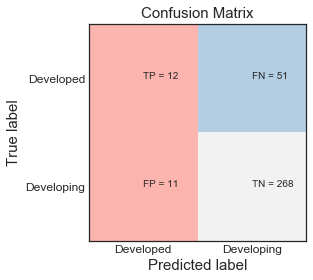

In [78]:
plotConfusion(cm)

#### Random Forest Classifier

In [79]:
rf_classifier = RandomForestClassifier(n_estimators=10, random_state = 42)
rf_classifier.fit(X_train,y_train)
pred = rf_classifier.predict(X_test)
print("F1 Score: ", metrics.f1_score(y_test,pred, average='weighted'))
print("Accuracy Score: ", accuracy_score(y_test,pred))

F1 Score:  0.8057539490441116
Accuracy Score:  0.8157894736842105


5-------0.7854949299855143
10-------0.8057539490441116
15-------0.8347549909255898
20-------0.8414527743371192
30-------0.8420650406649403
35-------0.8404940089150617
40-------0.8380497476568133
45-------0.8601773000139605
50-------0.8396157160639621
100-------0.8601053891209876
200-------0.8526343068997588
300-------0.8513226070357242
400-------0.8589051874572159
500-------0.8563901072124757
600-------0.8563901072124757
700-------0.8589051874572159


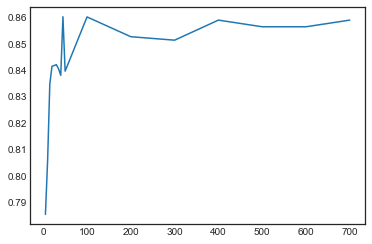

In [80]:
#Ensemble Random Forest Classifier Fine Tunning
estimators = [5,10,15,20,30,35,40,45,50,100,200,300,400,500,600,700]
f1_scores = []
for e in estimators:
    rf_classifier = RandomForestClassifier(n_estimators=e, random_state = 42)
    rf_classifier.fit(X_train,y_train)
    pred = rf_classifier.predict(X_test)
    f1_scores.append(f1_score(y_test,pred,average='weighted'))
    
plt.plot(estimators,f1_scores) 
for i in range (0,len(estimators)):
    print(str(estimators[i]) + "-------" + str(f1_scores[i]))

In [81]:
rf_classifier = RandomForestClassifier(n_estimators=400, random_state = 42)
rf_classifier.fit(X_train,y_train)
pred = rf_classifier.predict(X_test)
print("F1 Score: ", metrics.f1_score(y_test,pred, average='weighted'))
print("Accuracy Score: ", accuracy_score(y_test,pred))

F1 Score:  0.8589051874572159
Accuracy Score:  0.868421052631579


[0.8148496240601503, 0.8548349991053399, 0.8024672624401024, 0.8189266569200778, 0.8209626630679262, 0.8415512465373962, 0.8415512465373962, 0.8075388592767547, 0.8064388401559452, 0.8299412761190695, 0.8307940866319501]


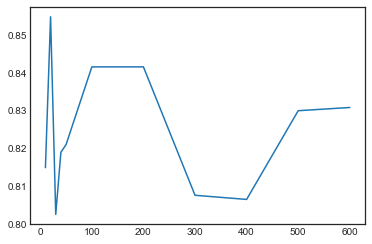

In [82]:
no_of_features = [10,20,30,40,50,100,200,300,400,500,600]
f1_scores = []
for e in no_of_features:
    rf_classifier = RandomForestClassifier(max_features = e ,n_estimators=5,random_state = 42)
    rf_classifier.fit(X_train,y_train)
    pred = rf_classifier.predict(X_test)
    f1_scores.append(f1_score(y_test,pred,average='weighted'))
    
plt.plot(no_of_features,f1_scores) 
print(f1_scores)

In [83]:
rf_classifier = RandomForestClassifier(n_estimators=400, max_features=20,random_state = 42)
rf_classifier.fit(X_train,y_train)
pred = rf_classifier.predict(X_test)
print("F1 Score: ", metrics.f1_score(y_test,pred, average='weighted'))
print("Accuracy Score: ", accuracy_score(y_test,pred))
cr = classification_report(y_test,pred)
cm = confusion_matrix(y_test,pred)

F1 Score:  0.8435643442446331
Accuracy Score:  0.8567251461988304


             precision    recall  f1-score   support

          0       0.68      0.43      0.52        63
          1       0.88      0.95      0.92       279

avg / total       0.84      0.86      0.84       342



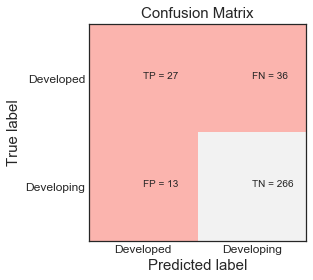

In [84]:
print(cr)
plotConfusion(cm)

In [85]:
#Logistic Regression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
pred = logmodel.predict(X_test)
print("F1 Score: ", metrics.f1_score(y_test,pred, average='weighted'))
print("Accuracy Score: ", accuracy_score(y_test,pred))

F1 Score:  0.734472089836512
Accuracy Score:  0.7690058479532164


In [86]:
#ExtraTreeClassifier
model = ExtraTreesClassifier(n_estimators=5,random_state=42)
model.fit(X_train, y_train)
pred = model.predict(X_test)
print("F1 Score: ", metrics.f1_score(y_test,pred, average='weighted'))
print("Accuracy Score: ", accuracy_score(y_test,pred))

F1 Score:  0.8487864574013957
Accuracy Score:  0.8538011695906432


[0.8487864574013957, 0.8833173511603059, 0.8833041958041957, 0.8816133326362442, 0.8807034945515144, 0.8859189859465418, 0.8929390335718721, 0.8771623113728376, 0.8859189859465418, 0.8781163434903045, 0.8674193620459809, 0.8699731590617342]


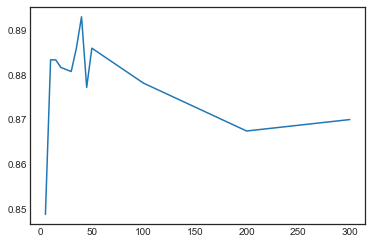

In [87]:
estimators = [5,10,15,20,30,35,40,45,50,100,200,300]
f1_scores = []
for e in estimators:
    model = ExtraTreesClassifier(n_estimators=e,random_state=42)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    f1_scores.append(f1_score(y_test,pred,average='weighted'))
    
plt.plot(estimators,f1_scores) 
print(f1_scores)

In [90]:
model = ExtraTreesClassifier(n_estimators=15,random_state=42)
model.fit(X_train, y_train)
pred = model.predict(X_test)
print("F1 Score: ", metrics.f1_score(y_test,pred, average='weighted'))
print("Accuracy Score: ", accuracy_score(y_test,pred))

F1 Score:  0.8833041958041957
Accuracy Score:  0.8888888888888888


[0.844995909462776, 0.8575896504009467, 0.8703026997545678, 0.8674193620459809, 0.8699731590617342, 0.8781163434903045, 0.8694711103425254, 0.8751218323586745, 0.8849755421661454, 0.8627197306636577, 0.8735859033461679]


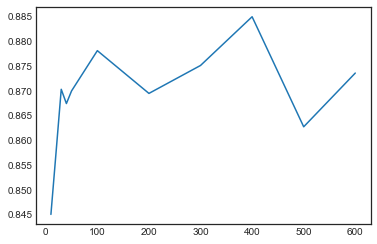

In [91]:
no_of_features = [10,20,30,40,50,100,200,300,400,500,600]
f1_scores = []
for e in no_of_features:
    model = ExtraTreesClassifier(max_features=e,n_estimators=15,random_state=42)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    f1_scores.append(f1_score(y_test,pred,average='weighted'))
    
plt.plot(no_of_features,f1_scores) 
print(f1_scores)

In [92]:
#ExtraTreeClassifier
model = ExtraTreesClassifier(n_estimators=15,max_features=400,random_state=42)
model.fit(X_train, y_train)
pred = model.predict(X_test)
print("F1 Score: ", metrics.f1_score(y_test,pred, average='weighted'))
print("Accuracy Score: ", accuracy_score(y_test,pred))
cr = classification_report(y_test,pred)
cm = confusion_matrix(y_test,pred)
print(classification_report(y_test,pred))

F1 Score:  0.8849755421661454
Accuracy Score:  0.8918128654970761
             precision    recall  f1-score   support

          0       0.78      0.57      0.66        63
          1       0.91      0.96      0.94       279

avg / total       0.89      0.89      0.88       342



             precision    recall  f1-score   support

          0       0.78      0.57      0.66        63
          1       0.91      0.96      0.94       279

avg / total       0.89      0.89      0.88       342



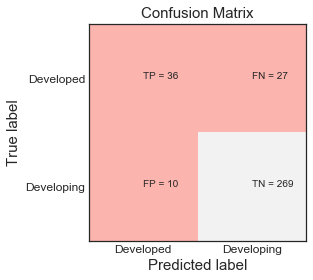

In [94]:
print(cr)
plotConfusion(cm)

In [96]:
# The "accuracy" scoring is proportional to the number of correct classifications
clf_rf_4 = RandomForestClassifier() 
rfecv = RFECV(estimator=clf_rf_4, step=1, cv=5,scoring='accuracy')   #5-fold cross-validation
rfecv = rfecv.fit(X_train, y_train)

print('Optimal number of features :', rfecv.n_features_)
print('Best features :', X_train.columns[rfecv.support_])

Optimal number of features : 644
Best features : Index(['normalized__autocorrelation__lag_1',
       'normalized__autocorrelation__lag_2',
       'normalized__autocorrelation__lag_3',
       'normalized__autocorrelation__lag_4',
       'normalized__autocorrelation__lag_5',
       'normalized__autocorrelation__lag_6',
       'normalized__autocorrelation__lag_7',
       'normalized__autocorrelation__lag_8',
       'normalized__autocorrelation__lag_9',
       'normalized__binned_entropy__max_bins_10',
       ...
       'normalized__symmetry_looking__r_0.6000000000000001',
       'normalized__symmetry_looking__r_0.65',
       'normalized__symmetry_looking__r_0.7000000000000001',
       'normalized__symmetry_looking__r_0.75',
       'normalized__symmetry_looking__r_0.8',
       'normalized__symmetry_looking__r_0.8500000000000001',
       'normalized__symmetry_looking__r_0.9',
       'normalized__symmetry_looking__r_0.9500000000000001',
       'normalized__time_reversal_asymmetry_statistic__

In [97]:
cols = X_train.columns[rfecv.support_]
X = X[cols]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=42)

[0.7777777777777778, 0.7573099415204678, 0.8216374269005848, 0.7982456140350878, 0.8245614035087719, 0.8216374269005848, 0.8128654970760234, 0.8216374269005848, 0.8128654970760234, 0.8128654970760234, 0.8128654970760234, 0.8157894736842105, 0.8157894736842105, 0.8157894736842105, 0.8187134502923976]


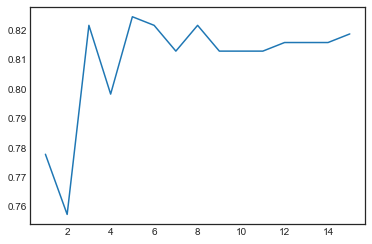

In [107]:
#KNN for different k values
kVals = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
scores = []

for k in kVals:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    pred = knn.predict(X_test)
    scores.append(accuracy_score(y_test,pred))
    
plt.plot(kVals,scores)    
print(scores) 

In [112]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
print(classification_report(y_test,pred))
print(f1_score(y_test,pred,average='weighted'))
print(accuracy_score(y_test,pred))

             precision    recall  f1-score   support

          0       0.67      0.10      0.17        63
          1       0.83      0.99      0.90       279

avg / total       0.80      0.82      0.77       342

0.7665118679050567
0.8245614035087719


[0.817344333609371, 0.8365866555450463, 0.8386692118898282, 0.8386692118898282, 0.8513226070357242, 0.8474661454697752, 0.8445277577505407, 0.8494957530344633, 0.8470044575307732, 0.8549576904065779, 0.8315717375630856, 0.8420650406649403]


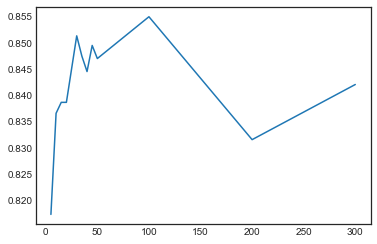

In [113]:
#Ensemble Random Forest Classifier Fine Tunning
estimators = [5,10,15,20,30,35,40,45,50,100,200,300]
f1_scores = []
for e in estimators:
    rf_classifier = RandomForestClassifier(n_estimators=e, random_state = 42)
    rf_classifier.fit(X_train,y_train)
    pred = rf_classifier.predict(X_test)
    f1_scores.append(f1_score(y_test,pred,average='weighted'))
    
plt.plot(estimators,f1_scores) 
print(f1_scores)

In [114]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state = 42)
rf_classifier.fit(X_train,y_train)
pred = rf_classifier.predict(X_test)
print(classification_report(y_test,pred))

             precision    recall  f1-score   support

          0       0.74      0.44      0.55        63
          1       0.88      0.96      0.92       279

avg / total       0.86      0.87      0.85       342



###### we have not still got good results because of class imbalances. Lets try Sampling 

In [115]:
df.label.value_counts()

1    716
0    138
Name: label, dtype: int64

In [116]:
df_0 = df [df['label'] == 0]

In [117]:
df_0.shape

(138, 797)

In [118]:
df_0 = df_0.sample(716,replace=True)

In [119]:
df_0.shape

(716, 797)

In [120]:
df_1 = df [df['label'] == 1]

In [121]:
df = pd.concat([df_0,df_1])

In [122]:
df.shape

(1432, 797)

In [123]:
y = df['label']
X = df.drop(columns=['Unnamed: 0', 'id','label'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=42)

[0.9245992655743992, 0.8611326908492933, 0.8430986972479783, 0.7957197611611538, 0.7940754983349141, 0.7360731166559633, 0.7545546457914264, 0.7066712103291972, 0.7181245649167517, 0.6914260148069542, 0.7112856716859719, 0.6917877098220916, 0.7026628730501037, 0.6897597412605758, 0.6900453535094038]


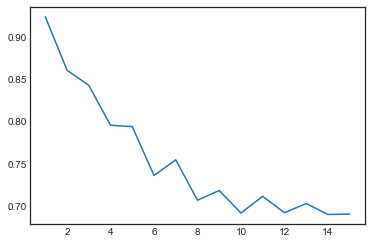

In [125]:
#KNN for different k values
kVals = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
scores = []

for k in kVals:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    pred = knn.predict(X_test)
    scores.append(f1_score(y_test,pred,average='weighted'))
    
plt.plot(kVals,scores)    
print(scores) 

In [132]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
print(classification_report(y_test,pred))
cm = confusion_matrix(y_test,pred)

             precision    recall  f1-score   support

          0       0.79      0.94      0.86       289
          1       0.93      0.75      0.83       284

avg / total       0.86      0.84      0.84       573



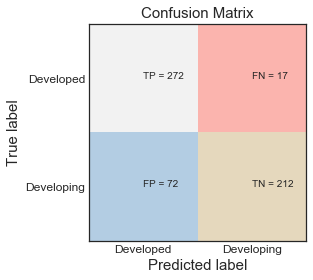

In [133]:
plotConfusion(cm)

F1 Score:  0.9510457779567727
Accuracy Score:  0.9511343804537522
             precision    recall  f1-score   support

          0       0.92      0.99      0.95       289
          1       0.99      0.91      0.95       284

avg / total       0.95      0.95      0.95       573



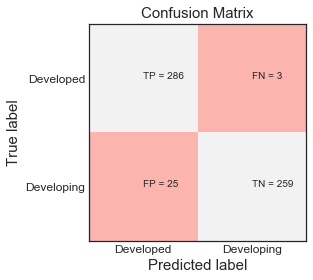

In [135]:
rf_classifier = RandomForestClassifier(n_estimators=10, random_state = 42)
rf_classifier.fit(X_train,y_train)
pred = rf_classifier.predict(X_test)
print("F1 Score: ", metrics.f1_score(y_test,pred, average='weighted'))
print("Accuracy Score: ", accuracy_score(y_test,pred))
print(classification_report(y_test,pred))
plotConfusion(confusion_matrix(y_test,pred))

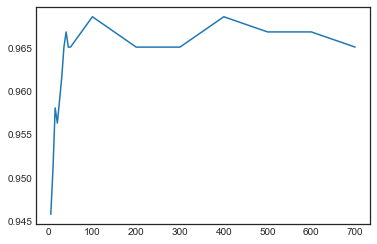

In [137]:
#Ensemble Random Forest Classifier Fine Tunning
estimators = [5,10,15,20,30,35,40,45,50,100,200,300,400,500,600,700]
f1_scores = []
for e in estimators:
    rf_classifier = RandomForestClassifier(n_estimators=e, random_state = 42)
    rf_classifier.fit(X_train,y_train)
    pred = rf_classifier.predict(X_test)
    f1_scores.append(f1_score(y_test,pred,average='weighted'))
    
plt.plot(estimators,f1_scores) 

             precision    recall  f1-score   support

          0       0.95      0.99      0.97       289
          1       0.99      0.95      0.97       284

avg / total       0.97      0.97      0.97       573



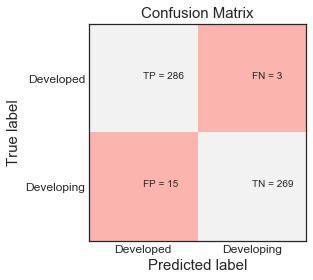

In [140]:
rf_classifier = RandomForestClassifier(n_estimators=400, random_state = 42)
rf_classifier.fit(X_train,y_train)
pred = rf_classifier.predict(X_test)
print(classification_report(y_test,pred))
plotConfusion(confusion_matrix(y_test,pred))

[0.9703156720393004, 0.9633172574595902, 0.9685668520822709, 0.9668175311144455, 0.9633172574595902, 0.9650676769725289, 0.9633172574595902, 0.9633172574595902, 0.9615662403430824, 0.959814593352853, 0.9633172574595902]


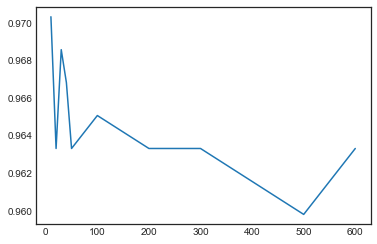

In [142]:
no_of_features = [10,20,30,40,50,100,200,300,400,500,600]
f1_scores = []
for e in no_of_features:
    rf_classifier = RandomForestClassifier(max_features = e ,n_estimators=400,random_state = 42)
    rf_classifier.fit(X_train,y_train)
    pred = rf_classifier.predict(X_test)
    f1_scores.append(f1_score(y_test,pred,average='weighted'))
    
plt.plot(no_of_features,f1_scores) 
print(f1_scores)

0.9703156720393004
             precision    recall  f1-score   support

          0       0.95      0.99      0.97       289
          1       0.99      0.95      0.97       284

avg / total       0.97      0.97      0.97       573



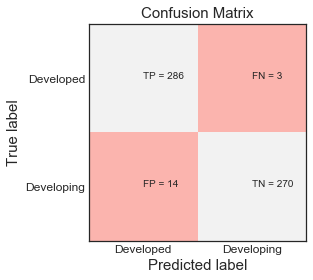

In [146]:
rf_classifier = RandomForestClassifier(max_features = 10 ,n_estimators=400,random_state = 42)
rf_classifier.fit(X_train,y_train)
pred = rf_classifier.predict(X_test)
print(f1_score(y_test,pred,average='weighted'))
print(classification_report(y_test,pred))
plotConfusion(confusion_matrix(y_test,pred))

[0.9668175311144455, 0.9650676769725289, 0.9755594470155878, 0.9720640231171753, 0.9720640231171753, 0.9773065839588784, 0.9755594470155878, 0.9790533802724514, 0.9773065839588784, 0.9773065839588784, 0.9738119374178549, 0.9755594470155878]


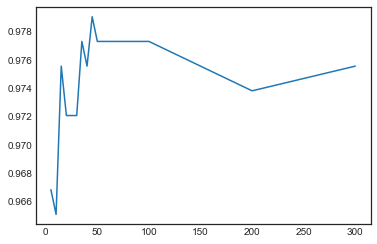

In [147]:
estimators = [5,10,15,20,30,35,40,45,50,100,200,300]
f1_scores = []
for e in estimators:
    model = ExtraTreesClassifier(n_estimators=e,random_state=42)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    f1_scores.append(f1_score(y_test,pred,average='weighted'))
    
plt.plot(estimators,f1_scores) 
print(f1_scores)

             precision    recall  f1-score   support

          0       0.97      0.99      0.98       289
          1       0.99      0.97      0.98       284

avg / total       0.98      0.98      0.98       573



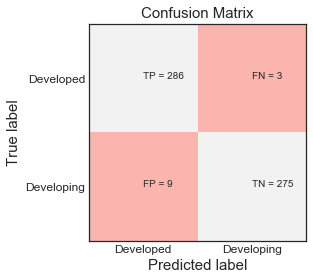

In [149]:
model = ExtraTreesClassifier(n_estimators=45,random_state=42)
model.fit(X_train, y_train)
pred = model.predict(X_test)
print(classification_report(y_test,pred))
plotConfusion(confusion_matrix(y_test,pred))

[0.9720640231171753, 0.9773065839588784, 0.9790533802724514, 0.9738119374178549, 0.9738119374178549, 0.9703156720393004, 0.9755594470155878, 0.9738119374178549, 0.9720640231171753, 0.9738119374178549, 0.9720640231171753]


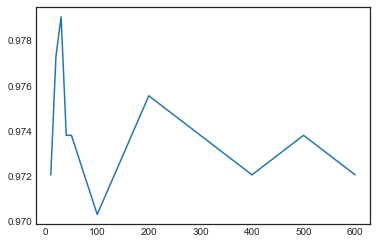

In [150]:
no_of_features = [10,20,30,40,50,100,200,300,400,500,600]
f1_scores = []
for e in no_of_features:
    model = ExtraTreesClassifier(max_features=e,n_estimators=45,random_state=42)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    f1_scores.append(f1_score(y_test,pred,average='weighted'))
    
plt.plot(no_of_features,f1_scores) 
print(f1_scores)

In [151]:
#ExtraTreeClassifier
model = ExtraTreesClassifier(n_estimators=45,max_features=30,random_state=42)
model.fit(X_train, y_train)
pred = model.predict(X_test)
print("F1 Score: ", metrics.f1_score(y_test,pred, average='weighted'))
print("Accuracy Score: ", accuracy_score(y_test,pred))
cr = classification_report(y_test,pred)
cm = confusion_matrix(y_test,pred)
print(classification_report(y_test,pred))

F1 Score:  0.9790533802724514
Accuracy Score:  0.9790575916230366
             precision    recall  f1-score   support

          0       0.97      0.99      0.98       289
          1       0.99      0.97      0.98       284

avg / total       0.98      0.98      0.98       573



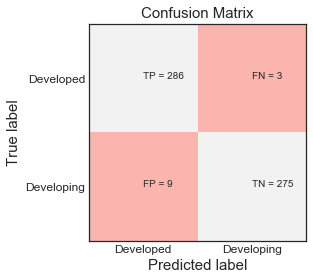

In [152]:
plotConfusion(cm)

In [153]:
#Logistic Regression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
pred = logmodel.predict(X_test)
print("F1 Score: ", metrics.f1_score(y_test,pred, average='weighted'))
print("Accuracy Score: ", accuracy_score(y_test,pred))

F1 Score:  0.6676529779417418
Accuracy Score:  0.6684118673647469


In [60]:
# pca = PCA(n_components=2)  
# X_train_pca = pca.fit_transform(X_train)  
# X_test_pca = pca.transform(X_test) 

In [64]:
# #KNN
# knn = KNeighborsClassifier(n_neighbors=2)
# knn.fit(X_train_pca,y_train)
# pred = knn.predict(X_test_pca)
# print("F1 Score: ", metrics.f1_score(y_test,pred, average='weighted'))
# print("Accuracy Score: ", accuracy_score(y_test,pred))